In [15]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False)


In [16]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)

predictions = Dense(117, activation='softmax')(x)

predictions = tf.keras.layers.Dropout(0.5)(predictions)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# Should add metric=[...]
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = r'..\Data\labledCountries\train'
validation_data_dir = r'..\Data\labledCountries\val'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [32]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 133426 images belonging to 117 classes.
Found 29568 images belonging to 117 classes.


In [33]:
import numpy as np

class_counts = np.bincount(train_generator.classes) ** 0.3

class_probabilities = class_counts / np.bincount(train_generator.classes)
class_probabilities = np.where(np.isinf(class_probabilities) | np.isnan(class_probabilities), 0, class_probabilities)

class_probabilities = class_probabilities / np.sum(class_probabilities)
class_weights = {i: weight for i, weight in enumerate(class_probabilities)}

class_indices = train_generator.class_indices

class_probabilities_dict = {class_name: class_probabilities[idx] for class_name, idx in class_indices.items()}

sorted_class_probabilities = sorted(class_probabilities_dict.items(), key=lambda item: item[1], reverse=False)

for class_name, probability in sorted_class_probabilities:
    print(f'{class_name}: {probability}')


Andorra: 0.0
Gibraltar: 0.0
Macao: 0.0
United States of America: 2.9057695986892125e-05
France: 8.344396120565337e-05
India: 9.55625819465994e-05
Russian Federation: 9.586520065482582e-05
Brazil: 0.00010672632044770321
Canada: 0.00010710907888449756
Australia: 0.00012372406560978057
Italy: 0.00014128465883203552
Japan: 0.00014257134182767625
Spain: 0.00014584630343273089
Thailand: 0.0001478428348578916
U.K. of Great Britain and Northern Ireland: 0.00014957805562854738
Poland: 0.00015992979733359786
Sweden: 0.00017512783281737137
Mexico: 0.00018267979315463997
Indonesia: 0.0001849931621297275
Norway: 0.00024145148022830802
Argentina: 0.00024765172569301863
Finland: 0.00026106835998124055
South Africa: 0.00028708290945587636
Turkey: 0.0002956666891858952
Ireland: 0.00030883053615828005
Philippines: 0.00031893339218470906
Romania: 0.0003313112048197736
Czech Republic: 0.00035551746146138063
New Zealand: 0.0003687944130276977
Portugal: 0.000411461313697229
Denmark: 0.0004135639313169792
Gr

C:\Users\21thebes\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch=1000,
    epochs=4,
    validation_data=validation_generator,
    validation_steps=100,
    class_weight = class_weights)


Epoch 1/4
 111/1000 [==>...........................] - ETA: 15:36 - loss: 0.0021

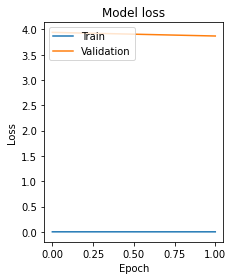

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.save('my_model.h5')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

data_dir = r'..\Data\labledCountries\val'
generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

class_names = generator.class_indices.keys()
#print(class_names)

Found 29568 images belonging to 117 classes.


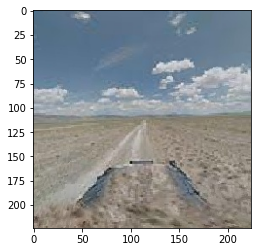

Country: ['India'], Probability: 0.2300039827823639
Country: ['Canada'], Probability: 0.09571459144353867
Country: ['United States of America'], Probability: 0.07371922582387924
Country: ['Argentina'], Probability: 0.01995224691927433
Country: ['Taiwan'], Probability: 0.019669681787490845
Country: ['Norway'], Probability: 0.01914949156343937
Country: ['Mexico'], Probability: 0.018887676298618317
Country: ['Australia'], Probability: 0.017682094126939774
Country: ['Japan'], Probability: 0.01660912297666073
Country: ['Brazil'], Probability: 0.015507332980632782
Country: ['Botswana'], Probability: 0.015418986789882183
Country: ['Colombia'], Probability: 0.015357638709247112
Country: ['Poland'], Probability: 0.014768536202609539
Country: ['Spain'], Probability: 0.014676956459879875
Country: ['South Africa'], Probability: 0.013771087862551212
Country: ['Thailand'], Probability: 0.01153414323925972
Country: ['Romania'], Probability: 0.011157682165503502
Country: ['Denmark'], Probability: 0.01

In [ ]:
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load image
img_path = r'..\Data\labledCountries\test\Mongolia\-HJY7GRr9lYn5fOORzdFew.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Display the image
plt.imshow(img)
plt.show()

# Preprocess image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.0

# Make prediction
predictions = model.predict(x)

# Print predictions in sorted order
label_encoder = LabelEncoder()
label_encoder.fit(list(class_names))

for i in np.argsort(predictions[0])[::-1]:
    print(f'Country: {label_encoder.inverse_transform([i])}, Probability: {predictions[0][i]}')
